# Exploration des données disponibles sur Mushroom-observer

Le fichier names .csv contient les différents nommages associés aux observations. Les noms sont organisés par rang.

Les différents rangs identifiés sont:
* 1: forme
* 2: variété
* 3: sous-espèce
* 4: espèce
* 5: Stirpes
* 6: sous-section
* 7: section
* 8: sous-genre
* 9: genre
* 10: famille
* 11: ordre
* 12: classe
* 13: phylum
* 14: regne
* 15: domaine
* 16: groupe

Le niveau de regroupement permettant une identification visuelle est le niveau espèce et supérieurs ( >= 4 )


56161 espèces  
65434 espèces, sous-espèces, formes et variétés  
37233 espèces sans synonymes (à priori le nombre d'espèces réellement distinctes)


rank
4     56161
9      5475
2      1469
7      1271
16      858
10      635
8       358
6       279
11      216
1       175
3       160
12       74
13       45
5        43
14       11
15        8
Name: count, dtype: int64

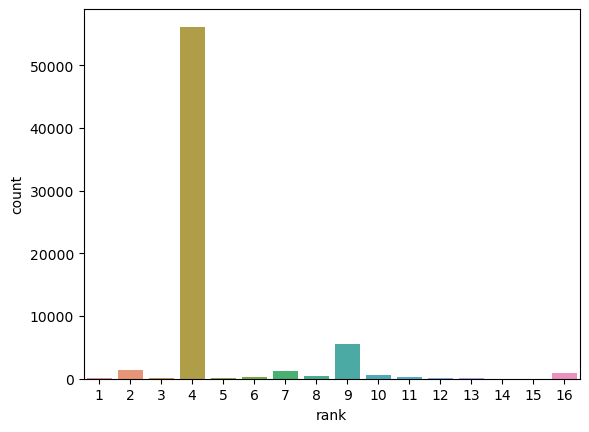

In [2]:
import seaborn as sns
import pandas as pd

dfNames = pd.read_csv("dataset-mushroom-observer/names.csv", sep="\t")
sns.countplot(x="rank", data=dfNames)
dfNames["rank"].value_counts()


# Jointure observation/classification

Réalisation d'une joiture sur ces deux fichiers pour visulaliser les images regroupées par ordre et par famille afin de valider ou d'invalider la possibilité d'une reconnaissance visuelle à ce niveau. Les resultats montrent que les niveaux ordre/famille ne permetent pas de reconnaissance visuelle.

Les données sont compilées dans un fichier json qui sera directement chargé dans une page html.

Visualisation:  
http://localhost:8888/notebooks/mushroom_observer/localhost/html/browse-orders.html  
http://localhost:8888/notebooks/mushroom_observer/localhost/html/browse-families.html

In [4]:
dfClassifications = pd.read_csv("dataset-mushroom-observer/name_classifications.csv", sep="\t")
#display(dfClassifications.head())
print("Nombre total de classifications : " + str(dfClassifications.name_id.count()))
dfClassificationsFiltered = dfClassifications[dfClassifications.kingdom == "Fungi"]
dfClassificationsFiltered = dfClassificationsFiltered.dropna()
dfClassificationsFiltered = dfClassificationsFiltered[dfClassificationsFiltered.phylum.isin(["Ascomycota", "Basidiomycota" ])]
#display(dfClassificationsFiltered.name_id.count())
print("Nombre d'ordres représentés : " + str(len(dfClassificationsFiltered.order.unique())))
print("Nombre de familles représentées : " + str(len(dfClassificationsFiltered.family.unique())))

dfObservations = pd.read_csv("dataset-mushroom-observer/observations.csv", sep="\t")
dfObservations = dfObservations.rename(columns={'id':'observation_id'})
#display(dfObservations.head())


dfObservations = pd.merge(dfObservations, dfClassificationsFiltered, how='inner', on='name_id')
#display(dfObservations.head())

order_counts = dfObservations['order'].value_counts()
dfObservations = dfObservations[dfObservations['order'].isin(order_counts[order_counts >= 100].index)]
#display(dfObservations.info())

dfObservations = dfObservations.dropna()
#display(dfObservations.info())


dfObservations = dfObservations.drop(
    ['when','location_id','lat','lng', ' alt', 'is_collection_location','domain','kingdom','phylum','class'],
    axis=1
    )

dfObservations.set_index('observation_id')
dfObservations.to_json("dataset-mushroom-observer/observation-classification.json", orient="split")

Nombre total de classifications : 32462
Nombre d'ordres représentés : 133
Nombre de familles représentées : 447


# Jointure observation/espèce

Réalisation d'une joiture sur ces deux fichiers pour visulaliser les images regroupées par espèce afin de valider ou d'invalider la possibilité d'une reconnaissance visuelle à ce niveau. Les resultats montrent que le niveau espèce et supérieur permettent une reconnaissance visuelle.

Les données sont compilées dans un fichier json qui sera directement chargé dans une page html.

Visualisation:
http://localhost:8888/notebooks/mushroom_observer/localhost/html/browse-species.html

In [5]:
dfNames = pd.read_csv("dataset-mushroom-observer/names.csv", sep="\t")
dfNames = dfNames.rename(columns={'id':'name_id'})
dfNames = dfNames[dfNames['rank'] == 4].rename(columns={'id':'name_id'})


dfObservations = pd.read_csv("dataset-mushroom-observer/observations.csv", sep="\t")
dfObservations = dfObservations.rename(columns={'id':'observation_id'})


dfObservations = pd.merge(dfObservations, dfNames, how='inner', on='name_id')


dfObservations = dfObservations.drop(
    ['when','location_id','lat','lng', ' alt', 'is_collection_location', 'author', 'deprecated', 'correct_spelling_id', 'synonym_id'],
    axis=1
    )

dfObservations = dfObservations.dropna()

dfObservations.set_index('observation_id')
dfObservations.to_json("dataset-mushroom-observer/observation-name.json", orient="split")
display(dfObservations.head())



,observation_id,name_id,vote_cache,thumb_image_id,text_name,rank
0,2,3,2.82744,2.0,Xylaria magnoliae,4
1,7,6,2.49991,7.0,Xerocomus zelleri,4
2,8,6,2.45144,8.0,Xerocomus zelleri,4
3,9,7,2.49991,9.0,Xerocomus subtomentosus,4
4,10,43604,2.32101,11.0,Xerocomellus dryophilus,4


# Exploration de la liste des images

Les images sont associées aux observations et sont de types différents. Cela dit lors du chargement depuis le site elles sont restituées en jpg systématiquement.

Réccupérer une image sur mushroom observer => https://images.mushroomobserver.org/orig/"id_image".jpg

(nb: le fichier a été tronqué pour respecter la limite de poids imposée par github)

In [6]:
print("Exploration du dataframe images : \n")
dfImages = pd.read_csv("dataset-mushroom-observer/images.csv", sep="\t")
dfImages.info()
print("\nTypes de contenus présents : \n")
display(dfImages.content_type.unique())
print("\nTypes de licences présents : \n")
display(dfImages.license.unique())

dfImagesPng = dfImages[dfImages.content_type == "image/vnd.adobe.photoshop"]
dfImagesPng.info()
dfImagesPng.head()

#exemple d'image manquante : 43311

Exploration du dataframe images : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183014 entries, 0 to 1183013
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   id                1183014 non-null  int64 
 1   content_type      1181575 non-null  object
 2   copyright_holder  1182786 non-null  object
 3   license           1183014 non-null  object
 4   ok_for_export     1183014 non-null  int64 
 5   diagnostic        1183014 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 54.2+ MB

Types de contenus présents : 



array(['image/jpeg', 'image/pjpeg', 'image/x-ms-bmp', 'image/tiff',
       'image/jpg', 'image/png', 'image/gif', 'image/vnd.adobe.photoshop',
       'image/jpeg;', 'image/x-olympus-orf', 'image/x-paintnet',
       'image/svg+xml', nan, 'image/jp2', 'image/webp', 'image/bmp'],
      dtype=object)


Types de licences présents : 



array(['Creative Commons Wikipedia Compatible v3.0',
       'Creative Commons Non-commercial v2.5',
       'Creative Commons Non-commercial v3.0', 'Public Domain'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 92419 to 1145634
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                21 non-null     int64 
 1   content_type      21 non-null     object
 2   copyright_holder  21 non-null     object
 3   license           21 non-null     object
 4   ok_for_export     21 non-null     int64 
 5   diagnostic        21 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.1+ KB


,id,content_type,copyright_holder,license,ok_for_export,diagnostic
92419,94908,image/vnd.adobe.photoshop,amadej trnkoczy,Creative Commons Wikipedia Compatible v3.0,1,1
98253,100811,image/vnd.adobe.photoshop,Debbie Drechsler,Creative Commons Non-commercial v3.0,1,1
119898,123205,image/vnd.adobe.photoshop,amadej trnkoczy,Creative Commons Wikipedia Compatible v3.0,1,1
128920,132408,image/vnd.adobe.photoshop,amadej trnkoczy,Creative Commons Wikipedia Compatible v3.0,1,1
129589,133097,image/vnd.adobe.photoshop,amadej trnkoczy,Creative Commons Wikipedia Compatible v3.0,1,1


* Téléchargement des observations complètes depuis l'API MO

In [7]:
import requests
import json

url = "https://mushroomobserver.org/api2/observations?detail=low&api_key=rvza3g2uemykm324sitccae4a0vallcr&format=json"
response = requests.get(url)
data = json.loads(response.content)
nbPages = data["number_of_pages"]

fichier = open("dataset-mushroom-observer/api-data-downloads/currentPageIndex.txt", "r")
lastPageIndex = fichier.read()

for currentPageIndex in range(int(lastPageIndex),nbPages+1):
    url = "https://mushroomobserver.org/api2/observations?detail=low&api_key=rvza3g2uemykm324sitccae4a0vallcr&format=json&page="+str(currentPageIndex)
    response = requests.get(url)
    json_str = response.content.decode("utf-8")

    fichier = open("dataset-mushroom-observer/api-data-downloads/observations-pages-"+str(currentPageIndex)+".json", "w")
    fichier.write(json_str)
    fichier.close()

    fichier = open("dataset-mushroom-observer/api-data-downloads/currentPageIndex.txt", "w")
    fichier.write(str(currentPageIndex))
    fichier.close()


# Compilation des données recueillies dans un fichier CSV

Les observation sont associées à un idice de confiance concernant la fiabilité de l'identification de l'espèce. Cette donnée n'est disponible que par téléchargement des données depuis l'api.  
La cellule suivante effectue le chargement des données d'observation téléchargées depuis l'api et le filtrage des résultats avec un indice de confiance minimal de 1.

Il reste 238212 observations après application.

In [ ]:
import pandas as pd
import json

fichier = open("dataset-mushroom-observer/api-data-downloads/observations-pages-1.json", "r", encoding="utf-8")
data = json.loads(fichier.read())
df = pd.DataFrame.from_dict(data["results"])
df.columns
df = df[['id', 'confidence']]
for i in range(1, 509):
    fichier = open("dataset-mushroom-observer/api-data-downloads/observations-pages-"+str(i)+".json", "r", encoding="utf-8")
    datapart = json.loads(fichier.read())
    dfpart = pd.DataFrame.from_dict(datapart["results"])
    dfpart = dfpart[['id', 'confidence']]
    df = pd.concat([df, dfpart], axis=0)

df = df.dropna()
df.describe()

df.to_csv("dataset-mushroom-observer/observations-confidence.csv", index=False)

# Jointure observations/images/noms

creation d'un dataset contenant l'association des noms, des observation et des images, filtré sur les espèces et les observation avec un degré de confiance >= 1

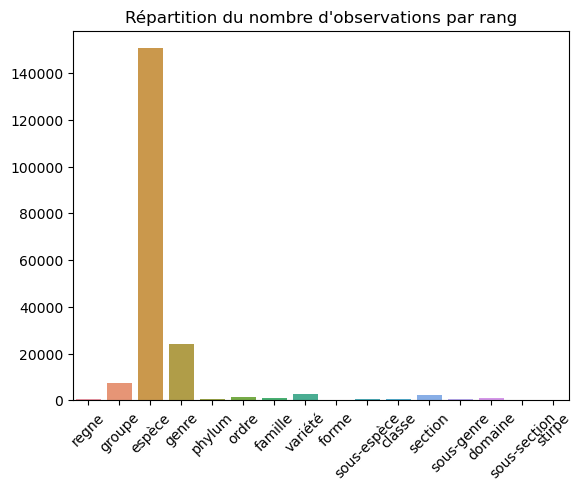

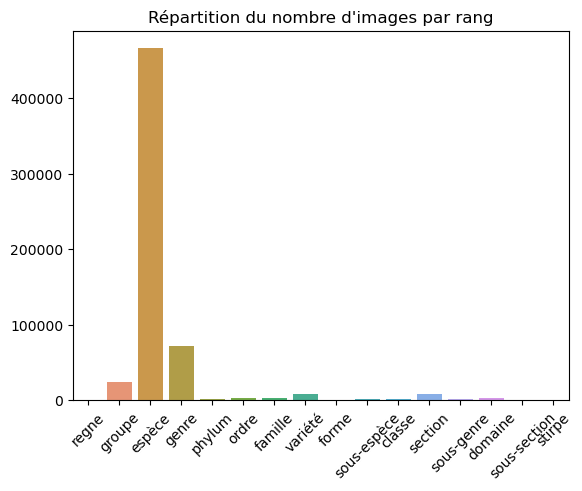

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfObservations = pd.read_csv("dataset-mushroom-observer/observations.csv", sep="\t")
dfConfidence = pd.read_csv("dataset-mushroom-observer/observations-confidence.csv")
dfConfidence = dfConfidence[dfConfidence.confidence >= 2]

dfObservations = dfObservations.drop(columns=['when', 'location_id', 'lat', 'lng', ' alt', 'vote_cache', 'is_collection_location', 'thumb_image_id'])
dfObservations.head()

dfObservations = pd.merge(left=dfConfidence, right=dfObservations, on=['id'])
dfObservations = dfObservations.rename(columns={"id":"observation_id"})


dfNames = pd.read_csv("dataset-mushroom-observer/names.csv", sep="\t")
dfNames.columns
dfNames = dfNames.drop(columns=['author', 'deprecated', 'correct_spelling_id', 'synonym_id',])
dfNames = dfNames.rename(columns={'id':'name_id'})


dfObservations = pd.merge(left=dfNames, right=dfObservations, on=['name_id'])
dfImagesObservation = pd.read_csv("dataset-mushroom-observer/images_observations.csv", sep="\t")
dfImagesObservation = pd.merge(left=dfObservations, right=dfImagesObservation, on=['observation_id'])


sns.countplot(x="rank", data=dfObservations.replace({
    1:'forme',
    2:'variété',
    3:'sous-espèce',
    4:'espèce',
    5:'stirpe',
    6:'sous-section',
    7:'section',
    8:'sous-genre',
    9:'genre',
    10:'famille',
    11:'ordre',
    12:'classe',
    13:'phylum',
    14:'regne',
    15:'domaine',
    16:'groupe',
    }))
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.title('Répartition du nombre d\'observations par rang')
plt.show()

sns.countplot(x="rank", data=dfImagesObservation.replace({
    1:'forme',
    2:'variété',
    3:'sous-espèce',
    4:'espèce',
    5:'stirpe',
    6:'sous-section',
    7:'section',
    8:'sous-genre',
    9:'genre',
    10:'famille',
    11:'ordre',
    12:'classe',
    13:'phylum',
    14:'regne',
    15:'domaine',
    16:'groupe',
    }))
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.title('Répartition du nombre d\'images par rang')
plt.show()

dfImagesObservation = dfImagesObservation[dfImagesObservation['rank'] == 4]

dfImagesObservation.to_json("dataset-mushroom-observer/images-observation-filtered.json", orient="split")
dfImagesObservation.to_csv("dataset-mushroom-observer/images-observation-filtered.csv")



,Unnamed: 0,name_id,text_name,rank,observation_id,confidence,image_id
0,1132,3,Xylaria magnoliae,4,2,2.82744,2
1,1133,3,Xylaria magnoliae,4,2,2.82744,2
2,1134,3,Xylaria magnoliae,4,8594,2.66123,16148
3,1135,3,Xylaria magnoliae,4,8594,2.66123,16149
4,1136,3,Xylaria magnoliae,4,8598,2.71617,16155


<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_name  130 non-null    object
 1   counts     130 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


<Axes: >

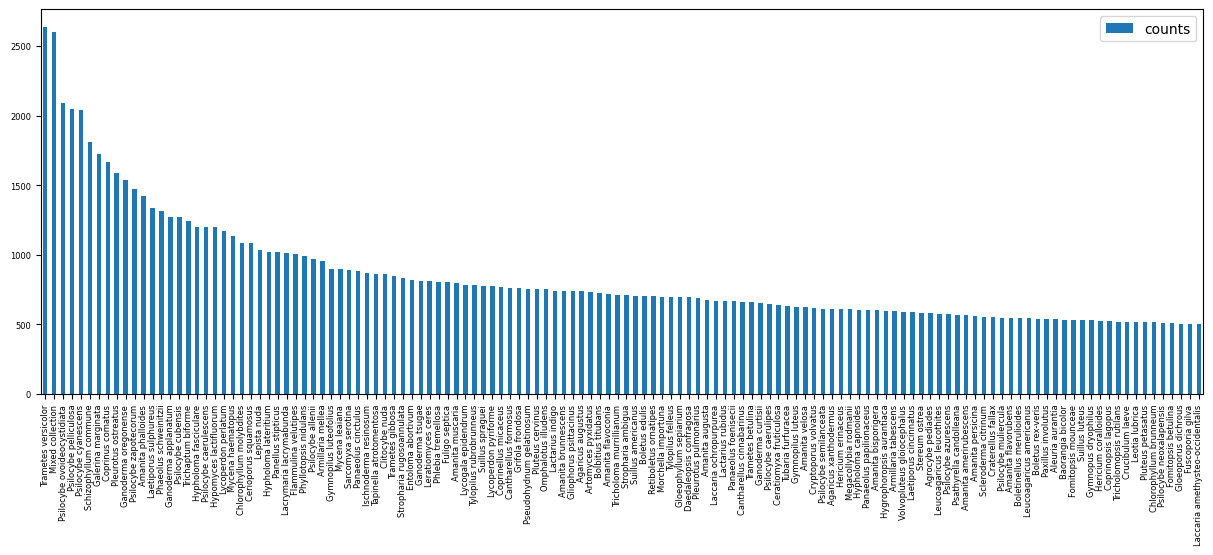

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

dfImagesObservation = pd.read_csv("dataset-mushroom-observer/images-observation-filtered.csv")
dfNames = pd.read_csv("dataset-mushroom-observer/names.csv", sep="\t")
dfNames = dfNames.rename(columns={'id':'name_id'})


#dfObservations = pd.merge(left=dfNames, right=dfImagesObservation, on=['name_id'])
display(dfImagesObservation.head())

name_id_counts = dfImagesObservation['text_name'].value_counts()

name_id_list = name_id_counts.index.to_list()
count_list = name_id_counts.values.tolist()
filtered_df = pd.DataFrame({'text_name': name_id_list, 'counts': count_list})
filtered_df = filtered_df[filtered_df['counts'] >= 500]
filtered_df.info()
filtered_df.plot(kind="bar", x="text_name", y="counts", figsize=[15,5], fontsize=6, xlabel="" )


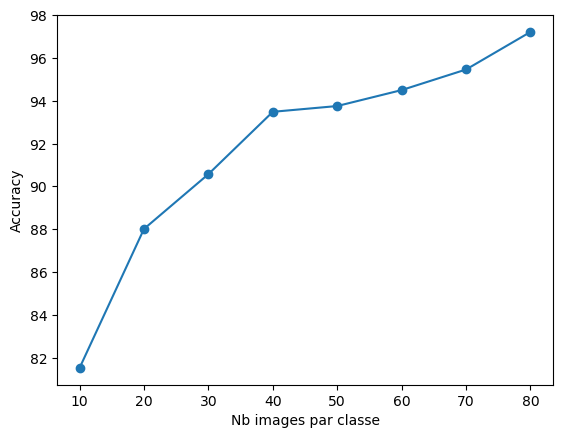

In [4]:
import matplotlib.pyplot as plt

# Liste de points
points = [
    [81.52866242038216, 10],
    [88.01766979569298, 20],
    [90.57558507273878, 30],
    [93.48630643967431, 40],
    [93.75557537912579, 50],
    [94.50056116722783, 60],
    [95.46142208774585, 70],
    [97.21577726218098, 80]
]

# Séparer les points en deux listes : x et y
y = [point[0] for point in points]
x = [point[1] for point in points]

# Tracer la courbe
plt.plot(x, y, marker='o')

# Ajouter des titres et des labels
plt.xlabel('Nb images par classe')
plt.ylabel('Accuracy')

# Afficher la courbe
plt.show()


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

dfImagesObservation = pd.read_csv("dataset-mushroom-observer/images-observation-filtered.csv")
dfNames = pd.read_csv("dataset-mushroom-observer/names.csv", sep="\t")
dfNames = dfNames.rename(columns={'id':'name_id'})


#dfObservations = pd.merge(left=dfNames, right=dfImagesObservation, on=['name_id'])
display(dfImagesObservation.head())

name_id_counts = dfImagesObservation['text_name'].value_counts()

name_id_list = name_id_counts.index.to_list()
count_list = name_id_counts.values.tolist()
filtered_df = pd.DataFrame({'text_name': name_id_list, 'counts': count_list})
filtered_df_500 = filtered_df[filtered_df['counts'] >= 500]
filtered_df_500.info()
filtered_df_100 = filtered_df[filtered_df['counts'] >= 100]
filtered_df_100 = filtered_df_100[filtered_df_100['counts'] < 500]
filtered_df_100.info()
filtered_df_1 = filtered_df[filtered_df['counts'] < 100]
filtered_df_1 = filtered_df_1[filtered_df_1['counts'] > 0]
filtered_df_1.info()

,Unnamed: 0,name_id,text_name,rank,observation_id,confidence,image_id
0,1132,3,Xylaria magnoliae,4,2,2.82744,2
1,1133,3,Xylaria magnoliae,4,2,2.82744,2
2,1134,3,Xylaria magnoliae,4,8594,2.66123,16148
3,1135,3,Xylaria magnoliae,4,8594,2.66123,16149
4,1136,3,Xylaria magnoliae,4,8598,2.71617,16155


<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_name  130 non-null    object
 1   counts     130 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 130 to 1081
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_name  952 non-null    object
 1   counts     952 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 22.3+ KB
